In [1]:
import os

path = "data/"

os.chdir(path)

if os.curdir != path:
    print("Error: Could not change directory to " + path)
    exit(1)

if os.curdir == path:
    print("Success: Changed directory to " + path)
    exit(1)
    
print(os.getcwd())

Error: Could not change directory to data/
c:\GitHub\Metabolic-network-layout-using-biochemical-coordinates\Notebooks\data


In [158]:
import pandas as pd


Pathway = "1515"
x_coord = "PC1"
y_coord = "PC2"

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")


PC1_PC2


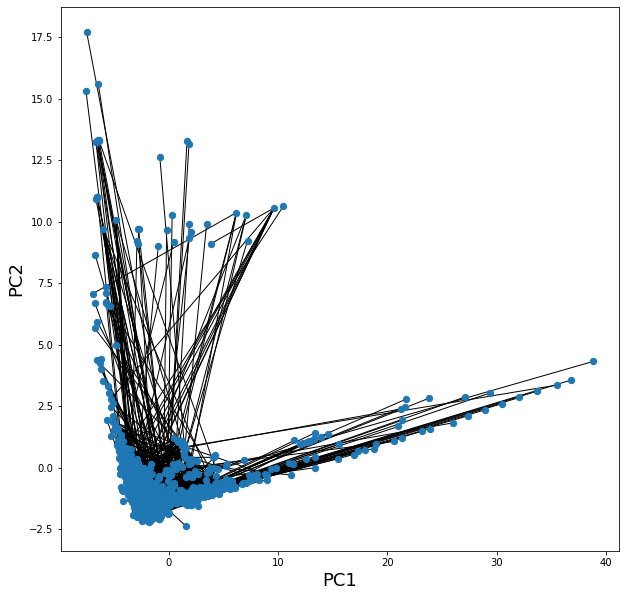

In [159]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()


#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{Pathway}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{Pathway}_targets.csv")

# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)


file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))


pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)




nx.draw(net2,pos_net1,node_size =40, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

# nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, with_labels = False, arrows = True, ax = ax)
# nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")
plt.show()
